In [1]:
import os
import idx2numpy

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import jax.numpy as jnp

# example of loading the cifar10 dataset
import matplotlib.pyplot as plt
from keras.datasets import cifar10

from PIL import Image
from array2gif import write_gif

from evojax.datasets import digit, fashion, kuzushiji, cifar, FOLDER_NAMES, DATASET_LABELS, read_data_files
from evojax.train_mnist_cnn import TestDatasetUtil

### Loading and reshaping the CIFAR-10 DataSet

In [2]:
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


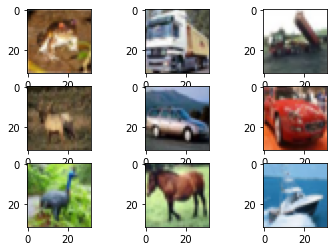

In [3]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i])
# show the figure
plt.show()

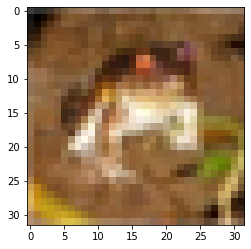

In [4]:
plt.imshow(trainX[0])

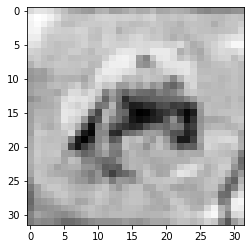

In [5]:
plt.imshow(np.mean(trainX[0], axis=2, keepdims=True), cmap='Greys')

2022-08-29 19:48:58.740887: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


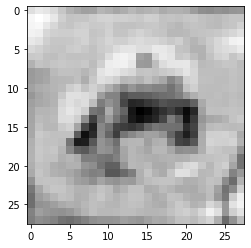

In [6]:
mnist_size = (28, 28)

resized_image = tf.image.resize(trainX[0], mnist_size)
plt.imshow(np.mean(resized_image, axis=2, keepdims=True), cmap='Greys')

In [7]:
trainX_processed = np.stack([np.mean(tf.image.resize(i, mnist_size), axis=2, keepdims=True) for i in trainX], axis=0)
testX_processed = np.stack([np.mean(tf.image.resize(i, mnist_size), axis=2, keepdims=True) for i in testX], axis=0)

In [8]:
trainX_processed.shape

(50000, 28, 28, 1)

In [9]:
trainX.shape

(50000, 32, 32, 3)

### Saving the idx files for CIFAR

In [10]:
dirname = os.getcwd()

In [11]:
# folder_path = os.path.join(dirname, 'CIFAR', 'raw')
#
# split = 'train'
# file_prefix = 't10k' if split == 'test' else split
#
# image_file = f'{file_prefix}-images-idx3-ubyte'
# label_file = f'{file_prefix}-labels-idx1-ubyte'
#
# trainX_to_save = trainX_processed.flatten().astype(np.uint8)
# idx2numpy.convert_to_file(os.path.join(folder_path, image_file), trainX_to_save)
# idx2numpy.convert_to_file(os.path.join(folder_path, label_file), trainy.flatten().astype(np.uint8))
#
# split = 'test'
# file_prefix = 't10k' if split == 'test' else split
#
# image_file = f'{file_prefix}-images-idx3-ubyte'
# label_file = f'{file_prefix}-labels-idx1-ubyte'
#
# testX_to_save = testX_processed.flatten().astype(np.uint8)
# idx2numpy.convert_to_file(os.path.join(folder_path, image_file), testX_to_save)
# idx2numpy.convert_to_file(os.path.join(folder_path, label_file), testy.flatten().astype(np.uint8))

### Exploring the masks generated in a run

In [12]:
file = np.load('masks_for_run_20220828_025958.npz')
arr = file["masks"]
arr.shape

(100, 4, 12544)

In [13]:
arr2 = np.reshape(arr, (-1, 4, 112, 112))
arr3 = np.transpose(arr2, (0, 2, 3, 1))

In [14]:
arr3.shape

(100, 112, 112, 4)

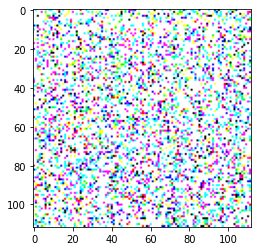

In [15]:
plt.imshow(arr3[20, :, :, :3]*255)

In [16]:
for i in range(arr3.shape[0]):
    plt.imsave(f'./mask_folder/mask_{i}.png', np.mean(arr3[i], axis=-1), cmap='Greys', vmin=0, vmax=1)

In [17]:
pics=[]
for i in range(20):
    img = Image.open(f'./mask_folder/mask_{i}.png')
    pics.append(img)
pics[0].save('masking_progression.gif', format='gif', save_all=True, append_images=pics[1:], duration=300, loop=0)

### Looking at mask similarities

In [18]:
int_arr = arr.astype(int)
int_arr_shifted1 = int_arr - 0.5
int_arr_shifted2 = int_arr - 1

In [19]:
int_arr.shape

(100, 4, 12544)

In [20]:
# Take the dot product of each mask with the others to get a measure of similarity
sim_arr1 = np.stack([int_arr[i] @ int_arr[i].T for i in range(int_arr.shape[0])])/int_arr.shape[-1]
sim_arr2 = 4 * np.stack([int_arr_shifted1[i] @ int_arr_shifted1[i].T for i in range(int_arr.shape[0])]) / int_arr.shape[-1]
sim_arr2 = np.stack([int_arr_shifted2[i] @ int_arr_shifted2[i].T for i in range(int_arr.shape[0])]) / int_arr.shape[-1]

In [21]:
sim_arr1.shape

(100, 4, 4)

In [22]:
sim_arr1[-1]

array([[0.66836735, 0.49075255, 0.52750319, 0.57573342],
       [0.49075255, 0.68048469, 0.52248087, 0.57692921],
       [0.52750319, 0.52248087, 0.71014031, 0.59478635],
       [0.57573342, 0.57692921, 0.59478635, 0.76267538]])

In [23]:
sim_arr2[-1]

array([[0.33163265, 0.14190051, 0.14899554, 0.14469069],
       [0.14190051, 0.31951531, 0.13185587, 0.13376913],
       [0.14899554, 0.13185587, 0.28985969, 0.12197066],
       [0.14469069, 0.13376913, 0.12197066, 0.23732462]])